## Assignment 3: Web Scraping

For this assignment, you are required to scrape data from e-commerce or other websites such as [Lelong](http://www.lelong.com.my), [Lazada](http://www.lazada.com.my/), [Mudah](http://www.mudah.my/), [iProperty](https://www.iproperty.com.my/), [Booking](http://www.booking.com), [Expedia](https://www.expedia.com.my/) etc.

You are required to fork this Jupyter Notebook from my Github [here](https://github.com/kuanhoong/EDS-Assignment3 ) and then scrape the latest 1000 items from one of the website mentioned above. The scraped data should include:

* Product Name/Product Title
* Amount/Price
* Brand
* Comments/Reviews
* Number of views

In addition, you are required to export the scraped data to dataframe format and also save a copy in csv format. Upon successful extracting data to dataframe, you are required to do a data analysis on the data. 

Your analysis should provide answers to the following questions:
* What do you think is interesting about this data? Tell a story about some interesting thing you have discovered by looking at the data.
* Visualize your data with matplotlib or with folium library package.

For example, you might consider whether there is a difference in pricings at different times doing the day or city, or whether other factors that influnced the pricings etc. Another thing you might consider is whether there is a relationship between the pricing and number of reviews or comments.

Show your analysis workflow in your Jupyter notebook.

The final submission should be pushed back to your respective Github account.

### Folium

[Folium](https://github.com/python-visualization/folium) makes it easy to visualize data that's been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.

In [1]:
import pandas as pd
import re
import numpy as np
import folium
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import requests

In [32]:
mapit = None
latlon = [ (3.144473, 101.708722), (3.144473, 101.708722),(3.135732, 101.686989)]
for coord in latlon:
    mapit = folium.Map( location=[ coord[0], coord[1] ] )
    folium.Marker([3.144473, 101.708722], icon=folium.Icon(color='blue',icon='star'), popup='Federal Hotel').add_to(mapit)
    folium.Marker([3.156374, 101.714579], icon=folium.Icon(color='green',icon='info-sign') , popup='Mandarin Oriental').add_to(mapit)
    folium.Marker([3.135732, 101.686989], icon=folium.Icon(color='red',icon='star') , popup='Le Meridien').add_to(mapit)
mapit

In [56]:
# scrape from lelong

# find the pattern for the first page
url = 'https://www.lelong.com.my/catalog/all/list?TheKeyword=ipad+pro&D='

# write a loop to scrape from page 1 to the last page

product_name=[]
price_name=[]
for page in range(1,9):
    url_page = url+str(page)
    scrape = requests.get(url_page)
    soup = BeautifulSoup(scrape.content, 'lxml')
    link = soup.find_all('div',{'class':'item','class':'summary'})
    link1 = soup.find_all('div',{'class':'col total'})
    length = len(link)
    for i in range(0,length):
        name = link[i].a.get('title')
        product_name.append(name)
        
        #span_linlink1[i].find_all('span',{'class':'price pull-right'})
        price = link1[i].div.span.b.string
        price_name.append(price)
        
        

In [58]:
# write to csv
# convert the list to a pandas dataframe

#df = pd.DataFrame({'name':product_name,'price':price_name})

#df['price'] = df.price.apply(lambda x : x.lstrip('RM '))

#df.to_csv('output.csv', index=False)

#df


In [5]:
#scrape for category page format
url = 'https://www.lelong.com.my/content/browse/browseAll'

url_page = url
scrape = requests.get(url_page)
soup = BeautifulSoup(scrape.content, 'lxml')
category_items = soup.find_all('div',class_='categoryBox')
length = len(category_items)

print(length)
print(category_items)



32
[<div class="categoryBox" id="btmPhone"> <a href="http://www.lelong.com.my/phone-and-tablet/"><span class="categoryTitle">Phone &amp; Tablet</span></a>
<table class="table borderless subCategoryTable"> <tr>
<td class="subCategoryPoint"><a href="http://www.lelong.com.my/phone-and-tablet/accessories/" id="allCat">Accessories</a></td>
<td class="subCategoryPoint"><a href="http://www.lelong.com.my/phone-and-tablet/answering-machine/" id="allCat">Answering Machine</a></td>
<td class="subCategoryPoint"><a href="http://www.lelong.com.my/phone-and-tablet/fax/" id="allCat">Fax</a></td>
<td class="subCategoryPoint"><a href="http://www.lelong.com.my/phone-and-tablet/handphone/" id="allCat">Handphone</a></td>
</tr>
<tr>
<td class="subCategoryPoint"><a href="http://www.lelong.com.my/phone-and-tablet/idd-card-and-airtime/" id="allCat">IDD Card &amp; Airtime</a></td>
<td class="subCategoryPoint"><a href="http://www.lelong.com.my/phone-and-tablet/pagers/" id="allCat">Pagers</a></td>
<td class="subC

In [7]:
## get all the category and sub-category ##
import bs4 #for bs4 type checking

category_list=[]
for items in category_items:
    main_category = items.a.span.text
    sub_table = items.table.find_all('tr')
    #print(main_category)
    
    sub_category_list = []
    for tr in sub_table:
        
        for td in tr: #loop for sub category
            #print('line:',type(td))
            if type(td) is bs4.element.Tag: #only valid tag/content
                sub_category_list.append(td.string.strip()) #strip extra newline
        
    category_list.append({main_category:sub_category_list})

#full list of category and su category
category_list



[{'Phone & Tablet': ['Accessories',
   'Answering Machine',
   'Fax',
   'Handphone',
   'IDD Card & Airtime',
   'Pagers',
   'Phone',
   'Phone System',
   'Prepaid Cards',
   'Repair Services',
   'Services',
   'SMS',
   'Voip Phone',
   'Walkie-Talkie',
   'Wearable Devices']},
 {'Computer & Software': ['Accessories',
   'Bluetooth',
   'Computer Storage',
   'Cooling Component & Accessories',
   'Cutting Plotter',
   'Domain Name',
   'Furniture',
   'Game',
   'Hard Disk',
   'Hardware',
   'Notebook',
   'PDAs',
   'Projector',
   'Refurbished',
   'Scanner',
   'Server Rack',
   'Services',
   'Software',
   'Tablet',
   'TV / Video Card',
   'Web Cam',
   'WIFI / WLAN']},
 {'Fashion': ['Cardigans',
   'Coats & Jackets',
   'Sweater & Hoodie',
   'Shirt & Blouses',
   'Top & Tee',
   'Dresses',
   'Jumpsuits and Rompers',
   'Pants & Caprits',
   'Legging & Jegging',
   'Muslimah',
   'Hijabs & Tudung',
   'Telekung',
   'Plus Size for Women',
   'Intimate & Sleep',
   'Bra & 

In [55]:
#process category and sub-category text to suit GET param

trim_category_list = []
for categories in category_list:
    #retrieve dict key and value
    (main_category, sub_category_list), = categories.items()
    #print(main_category)
    #print(sub_category_list)
    
    #process main category text
    trim_main_category = main_category.lower().replace(' !!','').replace(' ','-').replace(',','').replace('&','and')
    if(trim_main_category == 'sports-and-outdoors'):
        trim_main_category = 'sports-and-recreation'
    #print("::",trim_main_category,"::")
    
    trim_sub_category_list = []
    for sub_category in sub_category_list:
        #process sub category text
        sub_category = sub_category.lower().replace(' !!','').replace('-',' ').replace(' / ','-').replace('/','-').replace(' ','-').replace(',','').replace('&','and').replace('(','').replace(')','')
        #print("   ",sub_category)
        
        #push to trim sub category list
        trim_sub_category_list.append(sub_category)     
        
    #push to trim main category list
    trim_category_list.append({trim_main_category:trim_sub_category_list})
    #print("-----END------")
    #print()
    
print(trim_category_list)  



[{'phone-and-tablet': ['accessories', 'answering-machine', 'fax', 'handphone', 'idd-card-and-airtime', 'pagers', 'phone', 'phone-system', 'prepaid-cards', 'repair-services', 'services', 'sms', 'voip-phone', 'walkie-talkie', 'wearable-devices']}, {'computer-and-software': ['accessories', 'bluetooth', 'computer-storage', 'cooling-component-and-accessories', 'cutting-plotter', 'domain-name', 'furniture', 'game', 'hard-disk', 'hardware', 'notebook', 'pdas', 'projector', 'refurbished', 'scanner', 'server-rack', 'services', 'software', 'tablet', 'tv-video-card', 'web-cam', 'wifi-wlan']}, {'fashion': ['cardigans', 'coats-and-jackets', 'sweater-and-hoodie', 'shirt-and-blouses', 'top-and-tee', 'dresses', 'jumpsuits-and-rompers', 'pants-and-caprits', 'legging-and-jegging', 'muslimah', 'hijabs-and-tudung', 'telekung', 'plus-size-for-women', 'intimate-and-sleep', 'bra-and-bra-set', 'sleepwear-and-robes', 'shapewears', 'swimwear', 'sports-apparel', 'clothings', 'maternity', 'handbag', 'shoulder-bag

In [56]:
main_url = 'https://www.lelong.com.my/'

col_main_category = []
col_sub_category = []
col_sub_category_count = []
col_sub_category_state = []
col_sub_category_state_count = []

for items in trim_category_list: #loop all main and sub category
    #controlCount = 0
    #if(controlCount < 1):
    for keys, values in items.items(): #each main category loop
        print(keys)
        #print(values)
        #print(main_url+keys+'/')
        main_category_url = main_url+keys+'/'
        main_scrape = requests.get(main_category_url)
        main_soup = BeautifulSoup(scrape.content, 'lxml')

        #subControlCount = 0
        #if(subControlCount<1):
        for sub_category_value in values:
            print("  "+sub_category_value)
            #print(main_url+keys+'/'+sub_category_value+'/')
            sub_category_url = main_url+keys+'/'+sub_category_value+'/'
            sub_scrape = requests.get(sub_category_url)
            sub_soup = BeautifulSoup(sub_scrape.content, 'lxml')
            
            if(sub_soup.find("h1",class_='rightsec pull-right') is not None):
                sub_category_count = sub_soup.find("h1",class_='rightsec pull-right').get_text()
                sub_category_count = sub_category_count.replace('Showing ','')
                sub_category_count = sub_category_count.replace(' products','')
                print("  "+sub_category_count)

                #print(sub_soup.find('ul',attrs={'id':'stateListing'}))
                sub_category_state_list = sub_soup.find('ul',attrs={'id':'stateListing'})
                sub_category_state_list = sub_category_state_list.find_all('li',class_='facetchild-child')
                for item in sub_category_state_list:
                    stateName = item.a.find('span',class_="name").get_text()
                    stateTotal = item.a.find('span',class_="total").get_text()
                    stateTotal = stateTotal.replace('(','')
                    stateTotal = stateTotal.replace(')','')
                    #print("    "+stateName, stateTotal)

                    col_main_category.append(keys)
                    col_sub_category.append(sub_category_value)
                    col_sub_category_count.append(sub_category_count)
                    col_sub_category_state.append(stateName)
                    col_sub_category_state_count.append(stateTotal)

            #subControlCount += 1
        #controlCount += 1    
            
            
    #print()

phone-and-tablet
  accessories
  99639
  answering-machine
  32
  fax
  9
  handphone
  13686
  idd-card-and-airtime
  1
  pagers
  4
  phone
  1785
  phone-system
  342
  prepaid-cards
  227
  repair-services
  504
  services
  11
  sms
  3
  voip-phone
  183
  walkie-talkie
  2320
  wearable-devices
  2034
computer-and-software
  accessories
  9474
  bluetooth
  253
  computer-storage
  5110
  cooling-component-and-accessories
  1902
  cutting-plotter
  34
  domain-name
  4
  furniture
  309
  game
  1148
  hard-disk
  4620
  hardware
  88819
  notebook
  33204
  pdas
  1955
  projector
  3177
  refurbished
  1706
  scanner
  273
  server-rack
  192
  services
  207
  software
  1886
  tablet
  2284
  tv-video-card
  173
  web-cam
  255
  wifi-wlan
  1093
fashion
  cardigans
  coats-and-jackets
  sweater-and-hoodie
  shirt-and-blouses
  top-and-tee
  dresses
  jumpsuits-and-rompers
  pants-and-caprits
  legging-and-jegging
  muslimah
  hijabs-and-tudung
  telekung
  plus-size-for-wom

  3853
  electronic-parts
  3033
  energy-saver
  278
  fire-alarm-products
  54
  flashlight
  1758
  gadget
  1096
  general
  218
  generator
  47
  gps
  1036
  hand-tools
  4713
  home-and-kitchen
  17327
  home-theatre-system
  283
  ipod
  124
  ironing-and-garment-steamer
  karaoke-system
  146
  laser-disc-player
  4
  massage-equipment
  361
  measuring-equipment
  1733
  mp3-player
  494
  mp4-player
  63
  mp5-player
  4
  multimedia-and-hdd-player
  1084
  office-automation
  685
  personal-protective-equipment
  142
  portable-av
  67
  power-adapter
  1526
  security-system
  5682
  sewing-machine
  267
  smart-home-equipment
  943
  solar-products
  906
  test-equipment
  825
  tv
  1236
  vcd-and-dvd-recorder
  18
  vcd-player
  7
  vcr-player
  348
  others
  19781
food-and-beverages
  abalone
  2
  beverages
  458
  cake
  119
  candy
  209
  chocolate
  306
  coffee
  459
  cookies
  340
  dessert
  55
  food
  297
  frozen-food
  20
  fruit-juice
  67
  general
  4

In [57]:
print(len(col_main_category))
print(len(col_sub_category))
print(len(col_sub_category_count))
print(len(col_sub_category_state))
print(len(col_sub_category_state_count))

4456
4456
4456
4456
4456


In [94]:
df = pd.DataFrame({'main_category':col_main_category, 'sub_category':col_sub_category, 'sub_category_count':col_sub_category_count, 'col_sub_category_state':col_sub_category_state, 'col_sub_category_state_count':col_sub_category_state_count})


#print(df.info)
#print(df.describe)
df

,col_sub_category_state,col_sub_category_state_count,main_category,sub_category,sub_category_count
0,Selangor,43417,phone-and-tablet,accessories,99639
1,Kuala Lumpur,18195,phone-and-tablet,accessories,99639
2,Johor,11521,phone-and-tablet,accessories,99639
3,Oversea,8017,phone-and-tablet,accessories,99639
4,Penang,6110,phone-and-tablet,accessories,99639
5,Melaka,4209,phone-and-tablet,accessories,99639
6,Negeri Sembilan,2523,phone-and-tablet,accessories,99639
7,Perak,1644,phone-and-tablet,accessories,99639
8,Pahang,1416,phone-and-tablet,accessories,99639
9,Sarawak,738,phone-and-tablet,accessories,99639


In [106]:
df.dtypes

#convert object to integer
df['sub_category'] = df['sub_category'].astype(str)
df['sub_category_count'] = df['sub_category_count'].astype(str).astype(int)
df['col_sub_category_state'] = df['col_sub_category_state'].astype(str)
df['col_sub_category_state_count'] = df['col_sub_category_state_count'].astype(str).astype(int)


df.dtypes

col_sub_category_state          object
col_sub_category_state_count     int64
main_category                   object
sub_category                    object
sub_category_count               int64
dtype: object

In [142]:
df_group_by_main_category = df.groupby(['main_category','sub_category'],as_index=False)['sub_category_count'].sum()
df_group_by_state = df.groupby(['col_sub_category_state'],as_index=False)['col_sub_category_state_count'].sum().sort_values('col_sub_category_state',ascending=True)
df_group_by_state.columns = ['State', 'Total Products']

#print(df_group_by_main_category)
print(df_group_by_state)
df_group_by_state.dtypes

              State  Total Products
0             Johor           82067
1             Kedah           11812
2          Kelantan            1784
3      Kuala Lumpur          287881
4            Labuan             456
5            Melaka           18369
6   Negeri Sembilan           15272
7           Oversea           79143
8            Pahang            7006
9            Penang          105114
10            Perak           29410
11           Perlis            1164
12        Putrajaya             815
13            Sabah            3573
14          Sarawak            5889
15         Selangor          406030
16       Terengganu            2036


State             object
Total Products     int64
dtype: object

In [143]:
stateList = []
for state in df_group_by_state['State']:
    stateList.append(state)
    #print(type(state))

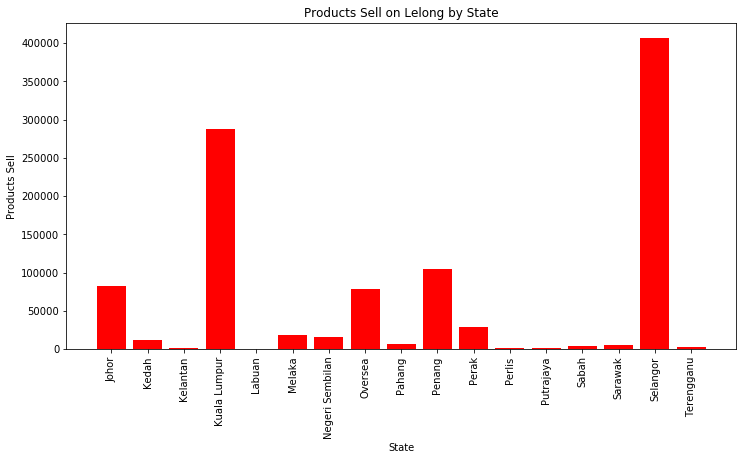

              State  Total Products
0             Johor           82067
1             Kedah           11812
2          Kelantan            1784
3      Kuala Lumpur          287881
4            Labuan             456
5            Melaka           18369
6   Negeri Sembilan           15272
7           Oversea           79143
8            Pahang            7006
9            Penang          105114
10            Perak           29410
11           Perlis            1164
12        Putrajaya             815
13            Sabah            3573
14          Sarawak            5889
15         Selangor          406030
16       Terengganu            2036


In [144]:
fig, axes = plt.subplots(figsize=(12,6))
#stateList = ['Selangor','Kuala Lumpur']
axes.bar(range(len(df_group_by_state['State'])),df_group_by_state['Total Products'],color='r')

axes.set_title("Products Sell on Lelong by State")
axes.set_ylabel("Products Sell")
#axes.set_yticklabels(df_group_by_state['Total Products'])
axes.set_xlabel("State")
axes.set_xticks(range(len(df_group_by_state['State'])))

axes.set_xticklabels(stateList,rotation='90');


plt.show()
print(df_group_by_state)


In [141]:
df_group_by_state_category = df.groupby(['col_sub_category_state','main_category'],as_index=False)['col_sub_category_state_count'].sum().sort_values('col_sub_category_state',ascending=True)
#df_group_by_state.columns = ['State', 'Total Products']

#print(df_group_by_main_category)
print(df_group_by_state_category)
df_group_by_state_category.dtypes

    col_sub_category_state                   main_category  \
0                    Johor  arts-antiques-and-collectibles   
25                   Johor          travel-tours-and-hotel   
24                   Johor                  toys-and-games   
23                   Johor           sports-and-recreation   
22                   Johor                        services   
21                   Johor                phone-and-tablet   
20                   Johor                    pet-supplies   
18                   Johor                  music-and-song   
17                   Johor          learning-and-education   
16                   Johor             jobs-and-freelances   
15                   Johor       jewellery-and-accessories   
14                   Johor                        internet   
13                   Johor              house-and-property   
19                   Johor                office-equipment   
11                   Johor              health-and-medical   
12      

col_sub_category_state          object
main_category                   object
col_sub_category_state_count     int64
dtype: object